In [1]:
# Autor: Elvis do A. Soares
# Github: @elvissoares
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import animation
from matplotlib.animation import PillowWriter
import scienceplots
plt.style.use(['science', 'notebook'])
from itertools import combinations

# Distribuição de Maxwell-Boltzmann

Vamos considerar partículas em uma caixa

In [2]:
n_particles = 20
r = np.random.random((2,n_particles))
# Colorir as partículas de cada lado
ixr = r[0]>0.5 #direita
ixl = r[0]<=0.5 #esquerda

Gráfico da configuração inicial

Text(0, 0.5, 'y')

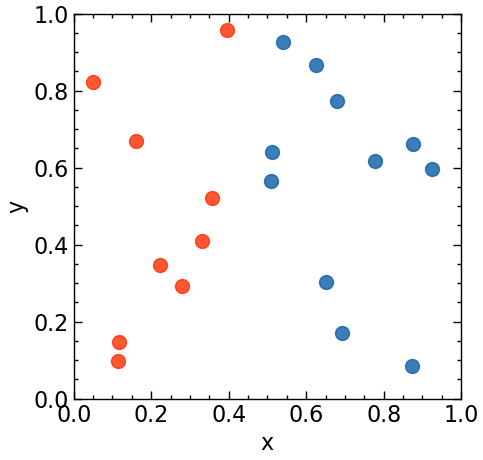

In [3]:
plt.figure(figsize=(5,5))
xblue, yblue = r[0][ixr], r[1][ixr]
xred, yred = r[0][ixl],r[1][ixl]

plt.plot(xblue, yblue ,'o',color='C0',ms=10.0,alpha = 0.8)
plt.plot(xred, yred,'o',color='C3',ms=10.0,alpha = 0.8)

# Limita os eixos
plt.xlim(0,1)
plt.ylim(0,1)

# Nome dos eixos 
plt.xlabel('x')
plt.ylabel('y')

Velocidades das partículas

In [4]:
v = np.zeros((2,n_particles))
v[0][ixr] = -500
v[0][ixl] = 500

Text(0, 0.5, 'y')

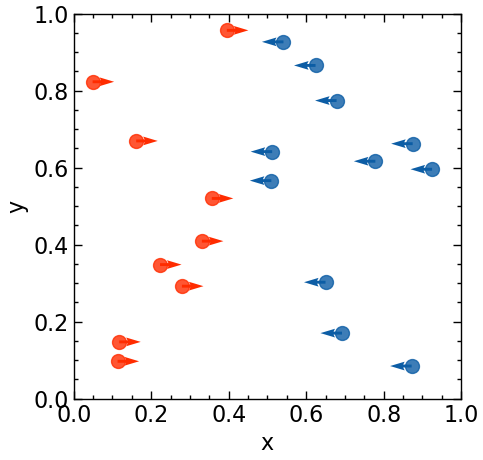

In [5]:
plt.figure(figsize=(5,5))
xblue, yblue = r[0][ixr], r[1][ixr]
xred, yred = r[0][ixl],r[1][ixl]

plt.plot(xblue, yblue ,'o',color='C0',ms=10.0,alpha = 0.8)
plt.plot(xred, yred,'o',color='C3',ms=10.0,alpha = 0.8)

plt.quiver(xblue, yblue, v[0][ixr], v[1][ixr], color='C0')
plt.quiver(xred, yred, v[0][ixl], v[1][ixl], color='C3')

# Limita os eixos
plt.xlim(0,1)
plt.ylim(0,1)

# Nome dos eixos 
plt.xlabel('x')
plt.ylabel('y')

## Pares de partículas

Vamo dar um ID para cada partícula

In [6]:
ids = np.arange(n_particles)

Para N partículas temos N*(N-1)/2 combinações possíveis de pares

In [7]:
ids_pairs = np.asarray(list(combinations(ids,2)))

Distância entre pares de partículas

In [8]:
x_pairs = np.array([r[0][ids_pairs[:,0]], r[0][ids_pairs[:,1]]]).T
x_pairs

array([[0.6924452 , 0.16133874],
       [0.6924452 , 0.87219214],
       [0.6924452 , 0.35642465],
       [0.6924452 , 0.5101539 ],
       [0.6924452 , 0.39528111],
       [0.6924452 , 0.11331033],
       [0.6924452 , 0.77857466],
       [0.6924452 , 0.54138848],
       [0.6924452 , 0.51224049],
       [0.6924452 , 0.27935618],
       [0.6924452 , 0.11746132],
       [0.6924452 , 0.62419077],
       [0.6924452 , 0.04886457],
       [0.6924452 , 0.22283414],
       [0.6924452 , 0.33082305],
       [0.6924452 , 0.87483117],
       [0.6924452 , 0.92491292],
       [0.6924452 , 0.64995398],
       [0.6924452 , 0.67848273],
       [0.16133874, 0.87219214],
       [0.16133874, 0.35642465],
       [0.16133874, 0.5101539 ],
       [0.16133874, 0.39528111],
       [0.16133874, 0.11331033],
       [0.16133874, 0.77857466],
       [0.16133874, 0.54138848],
       [0.16133874, 0.51224049],
       [0.16133874, 0.27935618],
       [0.16133874, 0.11746132],
       [0.16133874, 0.62419077],
       [0.

Distância relativa na direção X

In [9]:
dx_pairs = np.diff(x_pairs, axis=1).ravel()
dx_pairs

array([-0.53110646,  0.17974694, -0.33602055, -0.1822913 , -0.29716409,
       -0.57913487,  0.08612946, -0.15105672, -0.18020471, -0.41308902,
       -0.57498388, -0.06825443, -0.64358063, -0.46961106, -0.36162215,
        0.18238597,  0.23246772, -0.04249121, -0.01396247,  0.7108534 ,
        0.19508591,  0.34881516,  0.23394237, -0.04802841,  0.61723592,
        0.38004975,  0.35090175,  0.11801745, -0.04387741,  0.46285204,
       -0.11247417,  0.0614954 ,  0.16948432,  0.71349243,  0.76357419,
        0.48861525,  0.517144  , -0.51576749, -0.36203824, -0.47691103,
       -0.75888181, -0.09361748, -0.33080366, -0.35995165, -0.59283596,
       -0.75473082, -0.24800136, -0.82332757, -0.649358  , -0.54136909,
        0.00263903,  0.05272078, -0.22223815, -0.19370941,  0.15372925,
        0.03885646, -0.24311432,  0.42215001,  0.18496383,  0.15581584,
       -0.07706847, -0.23896333,  0.26776612, -0.30756008, -0.13359051,
       -0.0256016 ,  0.51840652,  0.56848827,  0.29352933,  0.32

Distância total entre os pares

In [10]:
x_pairs = np.array([r[0][ids_pairs[:,0]], r[0][ids_pairs[:,1]]]).T
y_pairs = np.array([r[1][ids_pairs[:,0]], r[1][ids_pairs[:,1]]]).T
dx_pairs = np.diff(x_pairs, axis=1).ravel()
dy_pairs = np.diff(y_pairs, axis=1).ravel()
d_pairs = np.sqrt(dx_pairs**2 + dy_pairs**2)
d_pairs

array([0.7288547 , 0.19905876, 0.48509962, 0.43599741, 0.84068246,
       0.58374336, 0.45466338, 0.77143562, 0.50462631, 0.43070654,
       0.57543584, 0.69859298, 0.91671351, 0.50219591, 0.43340382,
       0.52471814, 0.48497326, 0.13883311, 0.60418555, 0.92041768,
       0.24564841, 0.36373128, 0.37046559, 0.57437192, 0.61948362,
       0.45898304, 0.35200133, 0.39526004, 0.52379782, 0.50267858,
       0.19042603, 0.3270382 , 0.31058434, 0.7135283 , 0.76710619,
       0.61108247, 0.52766996, 0.67497629, 0.60249563, 0.99384292,
       0.75898188, 0.54013596, 0.90468162, 0.66308713, 0.62808594,
       0.75733307, 0.8192213 , 1.10590336, 0.70077645, 0.63113296,
       0.57753678, 0.51386827, 0.31110057, 0.71624624, 0.1605174 ,
       0.43826177, 0.4879562 , 0.43305179, 0.44671877, 0.1975748 ,
       0.24062529, 0.44270895, 0.43701684, 0.4317019 , 0.21772533,
       0.1138989 , 0.53753628, 0.57351315, 0.36545061, 0.41026054,
       0.40690133, 0.61456935, 0.27310605, 0.36179236, 0.07532

Define o raio das partículas e testa se os pares irão colidir

In [11]:
radius = 0.01
ids_pairs_collide = ids_pairs[d_pairs <= 2*radius]
ids_pairs_collide

array([], shape=(0, 2), dtype=int64)

Para cada par, a partícula "1" é a primeira do `ids_pairs_collide` e a partícula "2" é a segunda do par

In [12]:
v1 = v[:,ids_pairs_collide[:,0]]
v2 = v[:,ids_pairs_collide[:,1]]
r1 = r[:,ids_pairs_collide[:,0]]
r2 = r[:,ids_pairs_collide[:,1]]

## Nova velocidade após colisão

A partir da conservação do momento linear e da conservação da energia cinética do par de partículas:

$$\vec{v}_1^{\text{new}} = \vec{v}_1 - \frac{(\vec{v}_1 - \vec{v}_2) \cdot (\vec{r}_1 - \vec{r}_2)}{|\vec{r}_1 - \vec{r}_2|^2} (\vec{r}_1 - \vec{r}_2)$$
$$\vec{v}_2^{\text{new}} = \vec{v}_2 - \frac{(\vec{v}_2 - \vec{v}_1) \cdot (\vec{r}_2 - \vec{r}_1)}{|\vec{r}_1 - \vec{r}_2|^2} (\vec{r}_2 - \vec{r}_1)$$

Cálcula novas velocidades

In [13]:
v1new = v1 - ((v1-v2)*(r1-r2)).sum(axis=0)/np.sum((r1-r2)**2, axis=0) * (r1-r2)
v2new = v2 - ((v1-v2)*(r1-r2)).sum(axis=0)/np.sum((r2-r1)**2, axis=0) * (r2-r1)

## Simulação



In [14]:
def get_delta_pairs(x, ids_pairs):
    return np.diff(np.array([x[ids_pairs[:,0]], x[ids_pairs[:,1]]]).T, axis=1).ravel()

def get_deltad_pairs(r, ids_pairs):
    return np.sqrt(get_delta_pairs(r[0], ids_pairs)**2 + get_delta_pairs(r[1], ids_pairs)**2)

def compute_new_v(v1, v2, r1, r2):
    v1new = v1 - ((v1-v2)*(r1-r2)).sum(axis=0)/np.sum((r1-r2)**2, axis=0) * (r1-r2)
    v2new = v2 - ((v1-v2)*(r1-r2)).sum(axis=0)/np.sum((r2-r1)**2, axis=0) * (r2-r1)
    return v1new, v2new

def motion(r, v, id_pairs, nsteps, dt, d_cutoff):
    rs = np.zeros((nsteps, r.shape[0], r.shape[1]))
    vs = np.zeros((nsteps, v.shape[0], v.shape[1]))
    # Copia o estado inicial do sistema
    rs[0] = r.copy()
    vs[0] = v.copy()
    for i in range(1,nsteps):
        # Cálculo da nova posição 
        r = r + 0.5*v*dt

        # Obtem o par de partículas que colidem
        ic = id_pairs[get_deltad_pairs(r, ids_pairs) <= d_cutoff]

        # Cálcula novas velocidades
        v[:,ic[:,0]], v[:,ic[:,1]] = compute_new_v(v[:,ic[:,0]], v[:,ic[:,1]], r[:,ic[:,0]], r[:,ic[:,1]])
        
        # Reflexão nas paredes da caixa 
        v[0,r[0]>1] = -np.abs(v[0,r[0]>1])
        v[0,r[0]<0] = np.abs(v[0,r[0]<0])
        v[1,r[1]>1] = -np.abs(v[1,r[1]>1])
        v[1,r[1]<0] = np.abs(v[1,r[1]<0])
        
        # Cálculo da nova posição 
        r = r + 0.5*v*dt
        
        # Adiciona ao array de trajetória
        rs[i] = r.copy()
        vs[i] = v.copy()
    return rs, vs

Evolui a posição de todas elas (`rs` tem informações $(t,x,y)$)

In [15]:
rs, vs = motion(r, v, ids_pairs, nsteps=1000, dt=0.00002, d_cutoff=2*radius)

Text(0, 0.5, 'y')

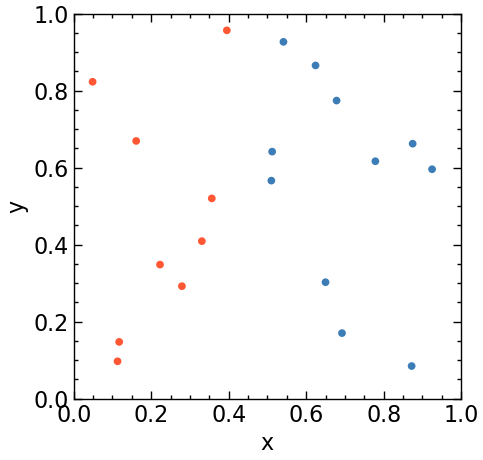

In [16]:
fig, ax = plt.subplots(1,1,figsize=(5,5))
xblue, yblue = rs[0][0][ixr], rs[0][1][ixr]
xred, yred = rs[0][0][ixl],rs[0][1][ixl]
circles_red = [plt.Circle((xi, yi), radius=radius, linewidth=0) for xi,yi in zip(xred,yred)]
circles_blue = [plt.Circle((xi, yi), radius=radius, linewidth=0) for xi,yi in zip(xblue,yblue)]
cred = matplotlib.collections.PatchCollection(circles_blue, facecolors='C0',alpha = 0.8)
cblue = matplotlib.collections.PatchCollection(circles_red, facecolors='C3',alpha = 0.8)
ax.add_collection(cred)
ax.add_collection(cblue)
ax.set_xlim(0,1)
ax.set_ylim(0,1)

ax.set_xlabel('x')
ax.set_ylabel('y')

Fazendo uma animação

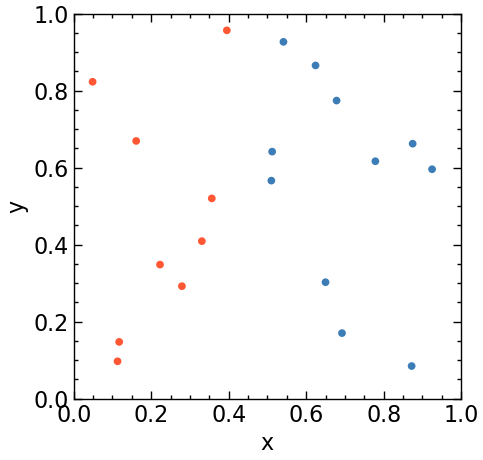

In [17]:
fig, ax = plt.subplots(1,1,figsize=(5,5))

def animate(i):
    ax.clear()
    xblue, yblue = rs[i][0][ixr], rs[i][1][ixr]
    xred, yred = rs[i][0][ixl],rs[i][1][ixl]
    circles_red = [plt.Circle((xi, yi), radius=radius, linewidth=0) for xi,yi in zip(xred,yred)]
    circles_blue = [plt.Circle((xi, yi), radius=radius, linewidth=0) for xi,yi in zip(xblue,yblue)]
    cred = matplotlib.collections.PatchCollection(circles_blue, facecolors='C0',alpha = 0.8)
    cblue = matplotlib.collections.PatchCollection(circles_red, facecolors='C3',alpha = 0.8)
    ax.add_collection(cred)
    ax.add_collection(cblue)
    ax.set_xlim(0,1)
    ax.set_ylim(0,1)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    
ani = animation.FuncAnimation(fig, animate, frames=1000, interval=50)
ani.save('MB-10_particulas.gif',writer='pillow',fps=30,dpi=100)

## Simulação com 1000 partículas


In [18]:
n_particles = 1000
r = np.random.random((2,n_particles))
ixr = r[0]>0.5 
ixl = r[0]<=0.5 
ids = np.arange(n_particles)
ids_pairs = np.asarray(list(combinations(ids,2)))
v = np.zeros((2,n_particles))
v[0][ixr] = -500
v[0][ixl] = 500
radius = 0.002
nsteps = 1000 # Numero total de passos
rs, vs = motion(r, v, ids_pairs, nsteps=nsteps, dt=0.00005, d_cutoff=2*radius)

Text(0, 0.5, 'y')

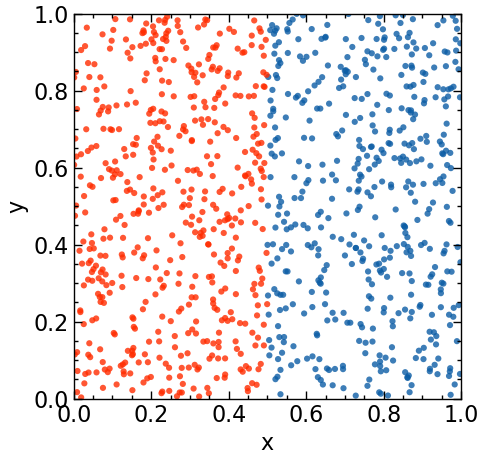

In [19]:
fig, ax = plt.subplots(1,1,figsize=(5,5))
xblue, yblue = rs[0][0][ixr], rs[0][1][ixr]
xred, yred = rs[0][0][ixl],rs[0][1][ixl]
circles_red = [plt.Circle((xi, yi), radius=4*radius, linewidth=0) for xi,yi in zip(xred,yred)]
circles_blue = [plt.Circle((xi, yi), radius=4*radius, linewidth=0) for xi,yi in zip(xblue,yblue)]
cred = matplotlib.collections.PatchCollection(circles_blue, facecolors='C0',alpha = 0.8)
cblue = matplotlib.collections.PatchCollection(circles_red, facecolors='C3',alpha = 0.8)
ax.add_collection(cred)
ax.add_collection(cblue)
ax.set_xlim(0,1)
ax.set_ylim(0,1)

ax.set_xlabel('x')
ax.set_ylabel('y')

Text(0, 0.5, 'y')

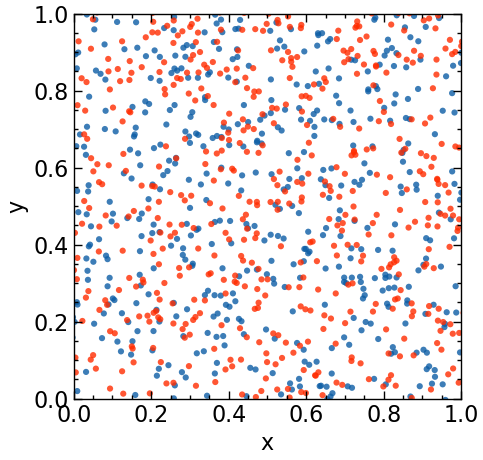

In [20]:
fig, ax = plt.subplots(1,1,figsize=(5,5))
xblue, yblue = rs[-1][0][ixr], rs[-1][1][ixr]
xred, yred = rs[-1][0][ixl],rs[-1][1][ixl]
circles_red = [plt.Circle((xi, yi), radius=4*radius, linewidth=0) for xi,yi in zip(xred,yred)]
circles_blue = [plt.Circle((xi, yi), radius=4*radius, linewidth=0) for xi,yi in zip(xblue,yblue)]
cred = matplotlib.collections.PatchCollection(circles_blue, facecolors='C0',alpha = 0.8)
cblue = matplotlib.collections.PatchCollection(circles_red, facecolors='C3',alpha = 0.8)
ax.add_collection(cred)
ax.add_collection(cblue)
ax.set_xlim(0,1)
ax.set_ylim(0,1)

ax.set_xlabel('x')
ax.set_ylabel('y')

## Temperatura e energia cinética média 

A energia cinética média das partículas pode ser calculada a partir da definição 

$$\langle K \rangle = \langle \frac{1}{2}m \boldsymbol{v}^2 \rangle $$

In [21]:
# Cálculo da energia cinética média 
K = 0.5*np.mean(vs[:,0]**2+ vs[:,1]**2, axis=1)

Text(0, 0.5, '$\\langle K \\rangle$')

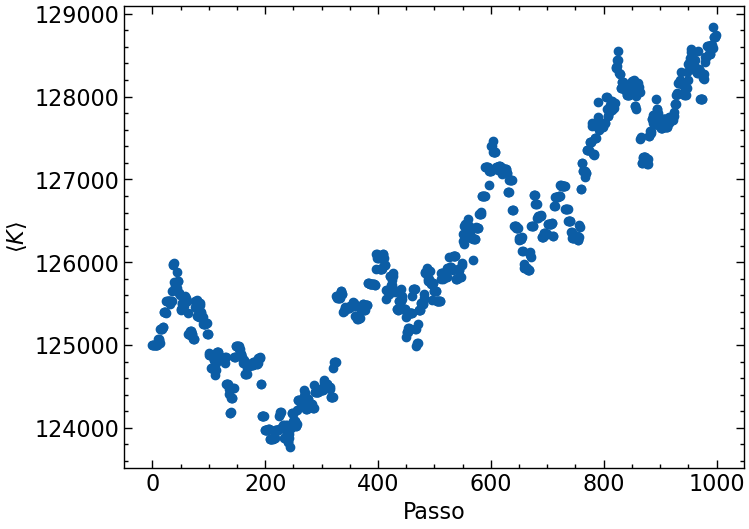

In [22]:
plt.scatter(np.arange(0,nsteps),K)

plt.xlabel('Passo')
plt.ylabel(r'$\langle K \rangle$')

A energia cinética média das partículas está associada a temperatura do gás 

$$\frac{d}{2}k_B T = \langle K \rangle = \langle \frac{1}{2}m \boldsymbol{v}^2 \rangle $$

com $d$ sendo a dimensão do problema (no nosso caso, $d=2$), e $k_B$ a constante de Bolztamnn. 

In [23]:
kToverm = 500**2

## Distribuição de Maxwell-Bolztamnn

A distribuição de velocidades em cada direção deve ser dada por uma gaussiana com variância dada pela temperatura na forma 

$$f(v_x) = c \exp{\left(-\frac{m v_x^2}{2 k_B T}\right)} \qquad \text{e} \qquad f(v_y) = c \exp{\left(-\frac{m v_y^2}{2 k_B T}\right)}$$

sendo $c$ uma constante de normalização dada por $\int_{-\infty}^\infty f(v_x) \text{d} v_x = \int_{-\infty}^\infty f(v_y) \text{d} v_y= 1$, tal que 

$$c = \left(\frac{m}{2\pi k_B T}\right)^{1/2}$$

In [24]:
c = 1/np.sqrt(2*np.pi*kToverm)

In [25]:
vx = np.arange(-2000,2000,0.1)

fvx = c*np.exp(-vx**2/(2*kToverm))

Text(0, 0.5, 'Nº de partículas')

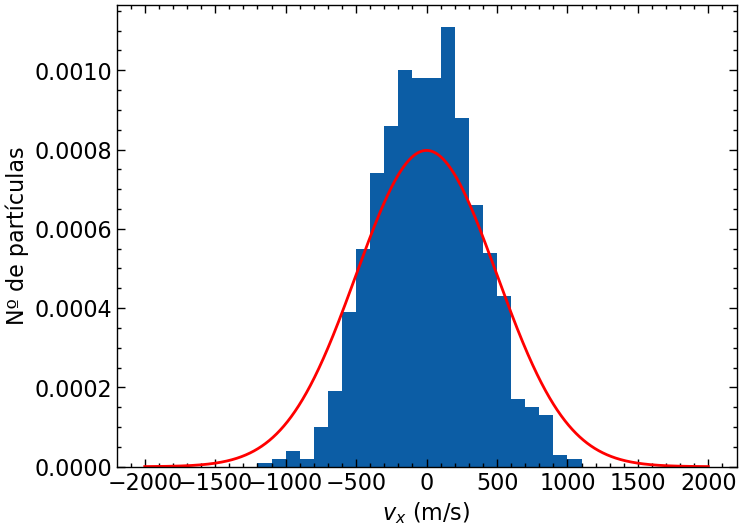

In [26]:
bins = np.arange(vx.min(),vx.max(),100)
plt.figure()
plt.hist(vs[-1][0], bins=bins, density=True)
plt.plot(vx,fvx,'r')
plt.xlabel(r'$v_x$ (m/s)')
plt.ylabel('Nº de partículas')

In [27]:
vy = vx.copy()

fvy = c*np.exp(-vy**2/(2*kToverm))

Text(0, 0.5, 'Nº de partículas')

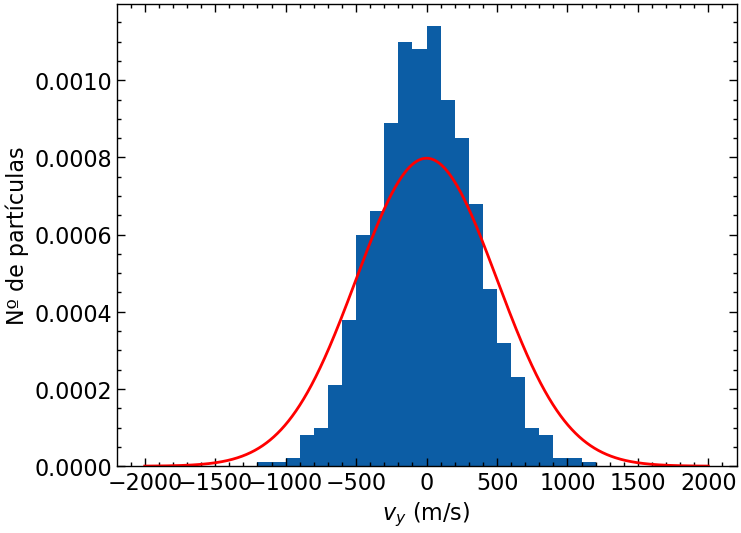

In [28]:
bins = np.arange(vy.min(),vy.max(),100)
plt.figure()
plt.hist(vs[-1][1], bins=bins, density=True)
plt.plot(vy,fvy,'r')
plt.xlabel(r'$v_y$ (m/s)')
plt.ylabel('Nº de partículas')

A distribuição total de velocidades é então dada pelo produto das distribuições na forma 

$$f(v_x,v_y) = f(v_x) f(v_y) = c^2 \exp{\left(-\frac{m (v_x^2+v_y^2)}{2 k_B T}\right)}$$

como a integral da distribuição deve ser feita em $v_x$ e $v_y$ temos que 

$$ \int_{-\infty}^\infty \int_{-\infty}^\infty f(v_x,v_y) \text{d} v_x \text{d} v_y = 1$$

e usando coordenadas polares chegamos a distribuição do módulo da velocidade dada por 

$$ \int_{0}^\infty  f(v) \text{d} v = \int_{0}^\infty  f(v_x,v_y) 2 \pi v \text{d} v = 1$$

tal que 

$$\boxed{f(v) = 2 \pi c^2 v \exp\left(-\frac{m v^2}{2 k_B T} \right)}$$

In [29]:
v = np.arange(0, 2000, 0.1)

fv = c**2*2*np.pi*v*np.exp(-v**2/(2*kToverm) )

Histograma de velocidades

Text(0, 0.5, 'Nº de partículas')

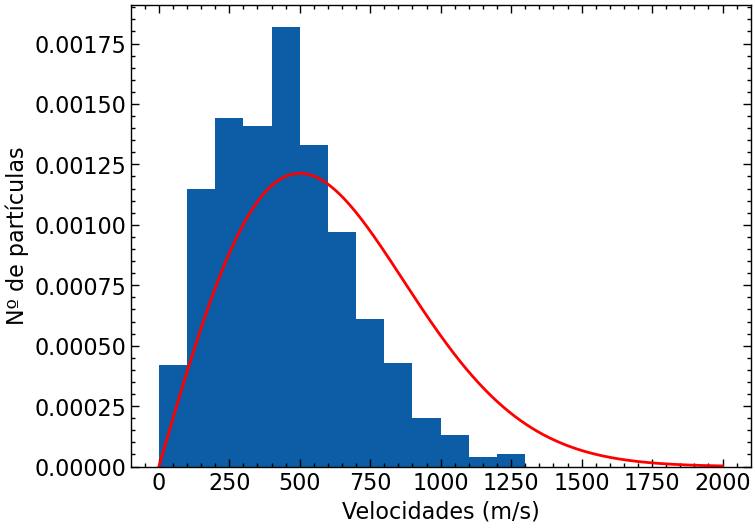

In [30]:
bins = np.arange(v.min(),v.max(),100)
plt.figure()
plt.hist(np.sqrt(np.sum(vs[-1]**2, axis=0)), bins=bins, density=True)
plt.plot(v,fv,'r')
plt.xlabel('Velocidades (m/s)')
plt.ylabel('Nº de partículas')

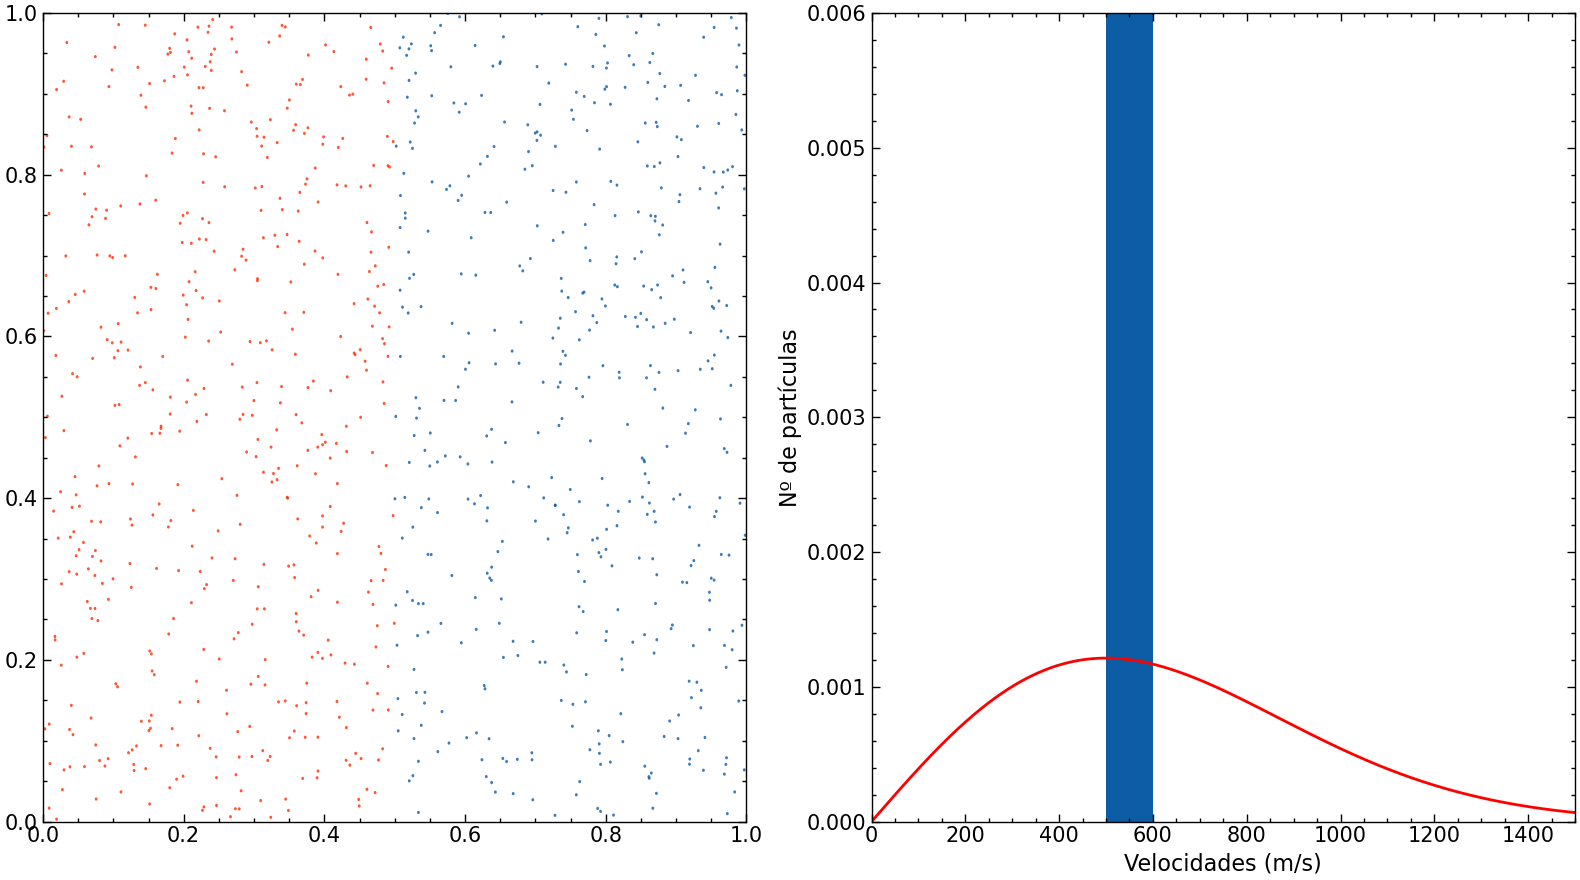

In [31]:
fig, axes = plt.subplots(1, 2, figsize=(16,9))

def animate(i):
    [ax.clear() for ax in axes]
    ax = axes[0]
    xred, yred = rs[i][0][ixr], rs[i][1][ixr]
    xblue, yblue = rs[i][0][ixl],rs[i][1][ixl]
    circles_red = [plt.Circle((xi, yi), radius=radius, linewidth=0) for xi,yi in zip(xred,yred)]
    circles_blue = [plt.Circle((xi, yi), radius=radius, linewidth=0) for xi,yi in zip(xblue,yblue)]
    cred = matplotlib.collections.PatchCollection(circles_red, facecolors='C0',alpha = 0.8)
    cblue = matplotlib.collections.PatchCollection(circles_blue, facecolors='C3',alpha = 0.8)
    ax.add_collection(cred)
    ax.add_collection(cblue)
    ax.set_xlim(0,1)
    ax.set_ylim(0,1)
    ax.tick_params(axis='x', labelsize=15)
    ax.tick_params(axis='y', labelsize=15)
    ax = axes[1]
    ax.hist(np.sqrt(np.sum(vs[i]**2, axis=0)), bins=bins, density=True)
    ax.plot(v,fv,'r')
    ax.set_xlabel('Velocidades (m/s)')
    ax.set_ylabel('Nº de partículas')
    ax.set_xlim(0,1500)
    ax.set_ylim(0,0.006)
    ax.tick_params(axis='x', labelsize=15)
    ax.tick_params(axis='y', labelsize=15)
    fig.tight_layout()
    
    
ani = animation.FuncAnimation(fig, animate, frames=nsteps, interval=50)
ani.save('MB-1000_particulas-histogram.gif',writer='pillow',fps=30,dpi=100)